In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import time

In [2]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [4]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [5]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
print(df.duplicated().sum())
print(df.duplicated().sum()*100/len(df))

1635
2.3128501103378034


In [8]:
df = df.drop_duplicates()
df.duplicated().sum()

0

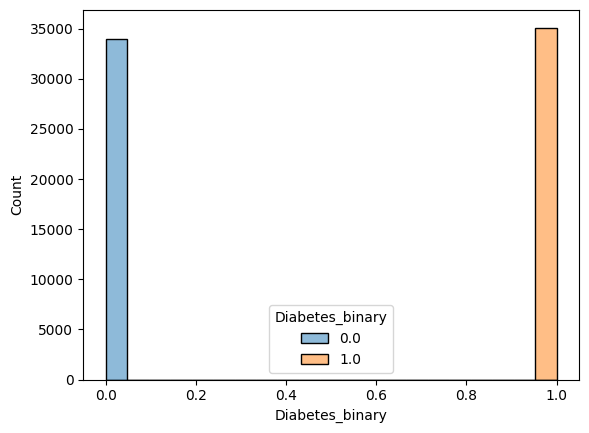

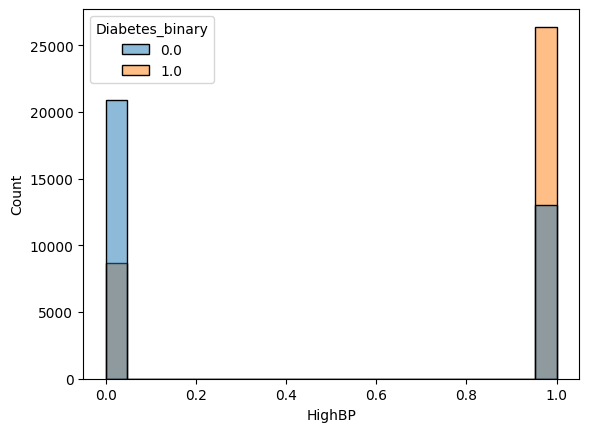

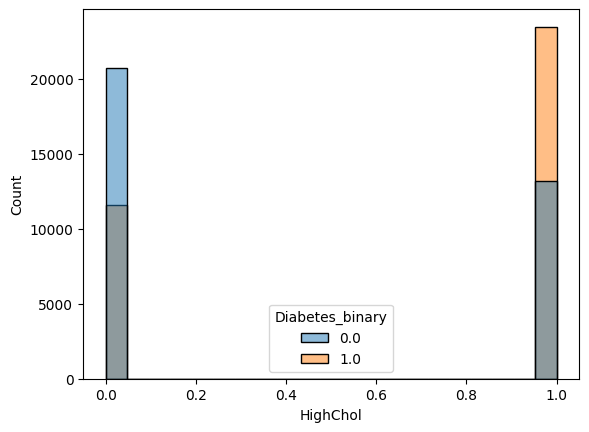

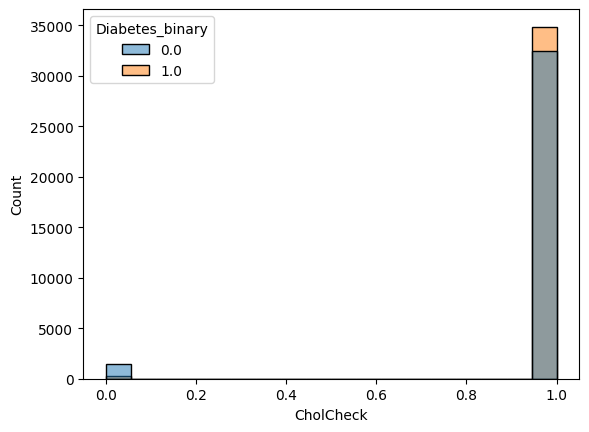

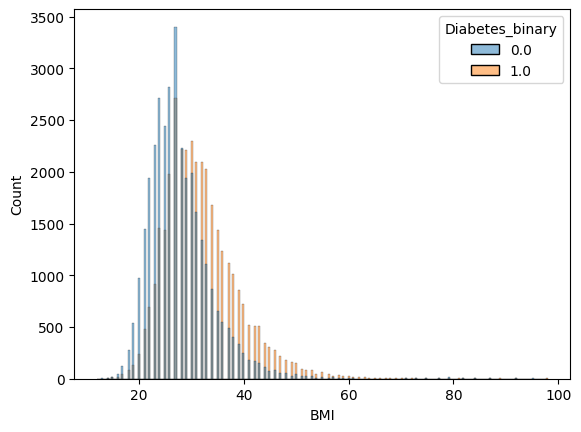

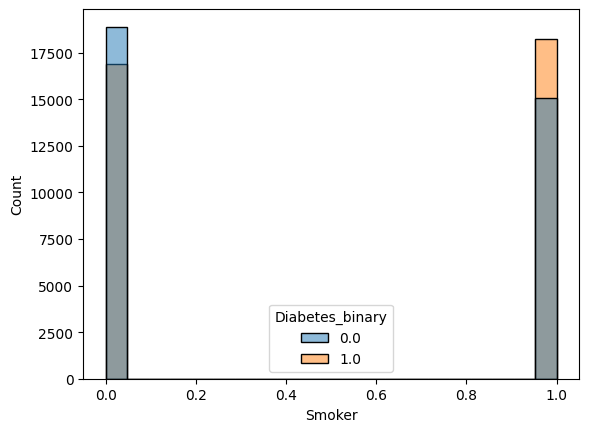

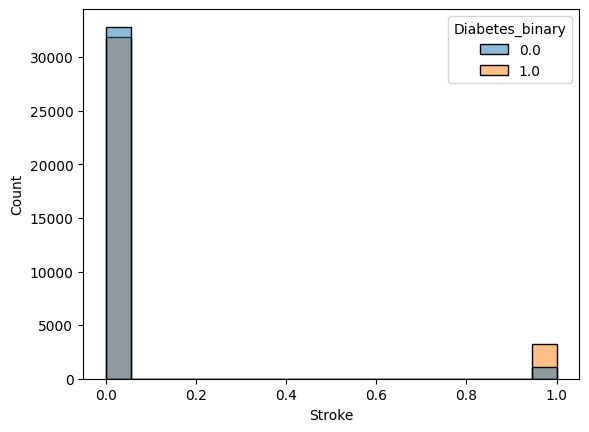

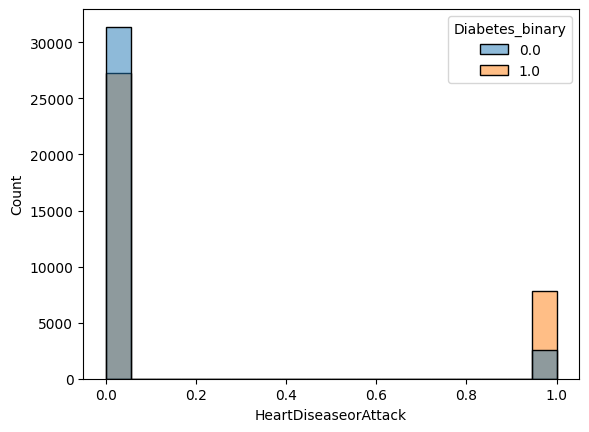

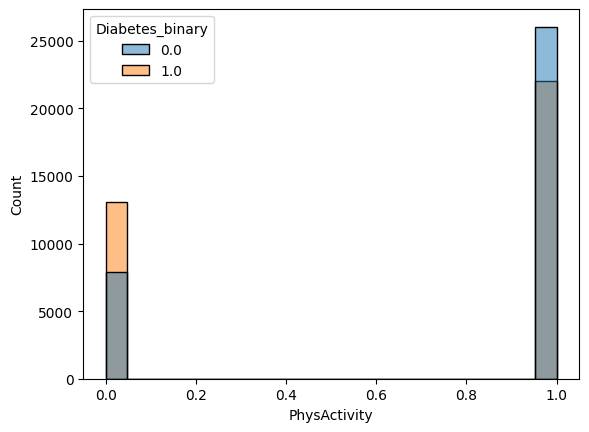

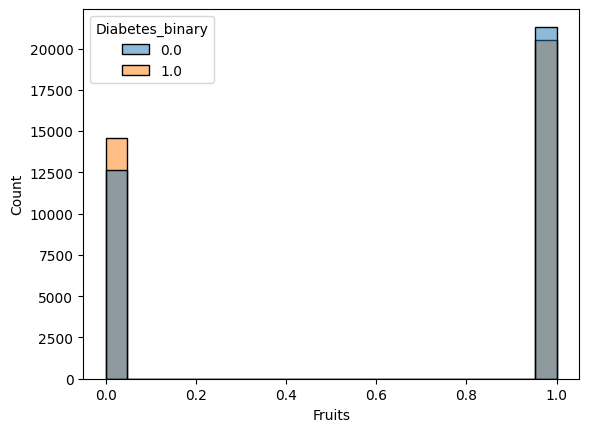

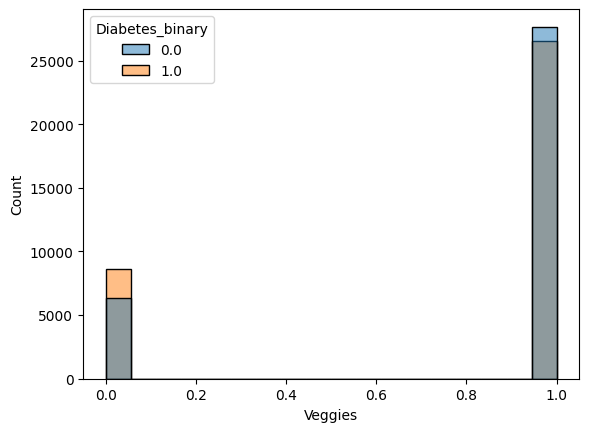

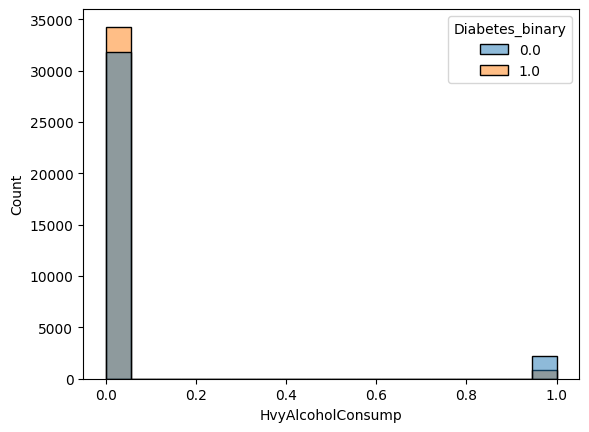

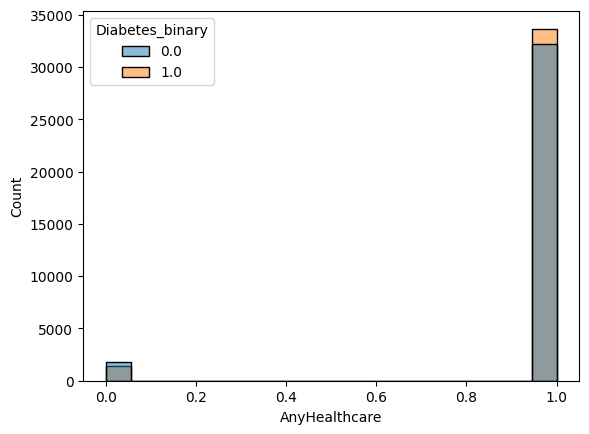

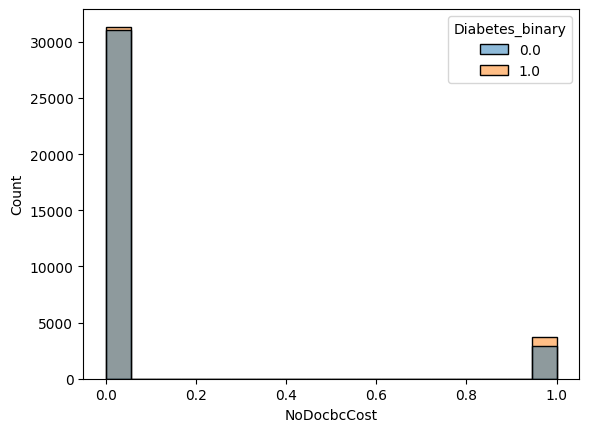

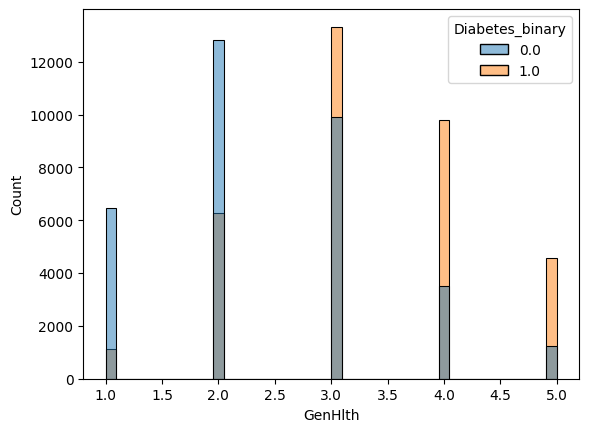

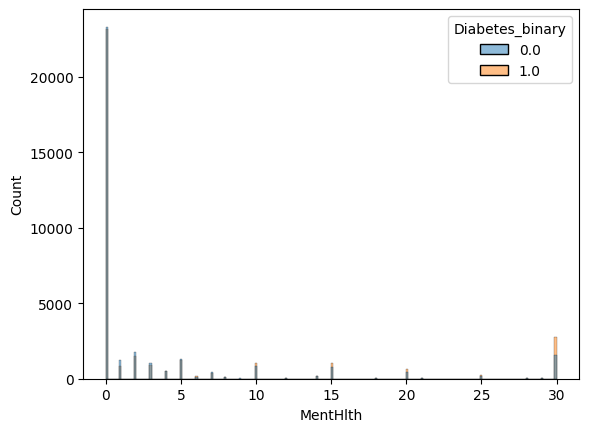

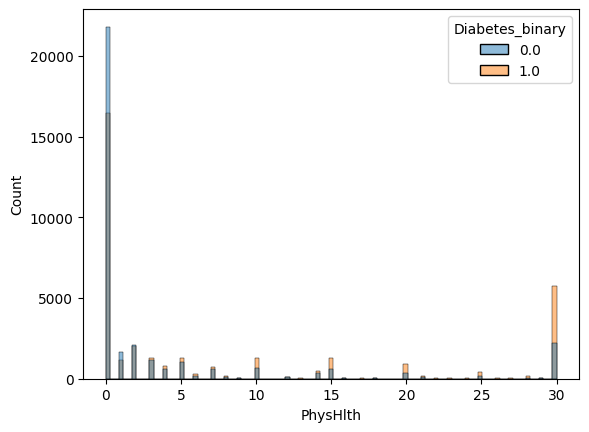

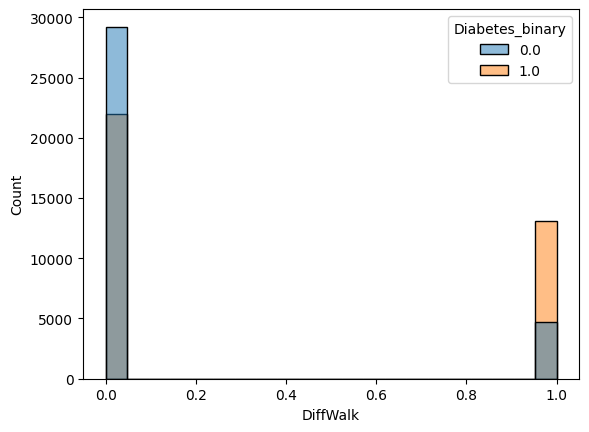

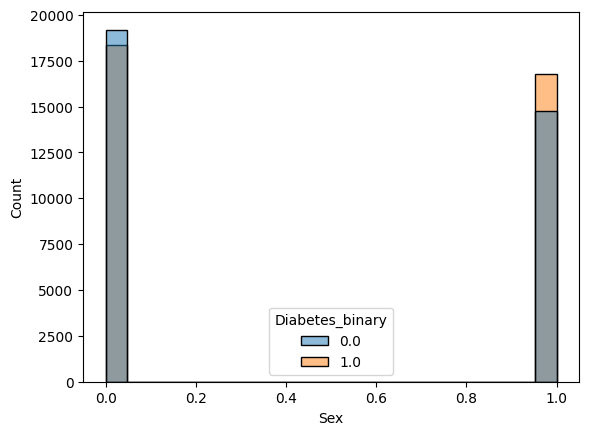

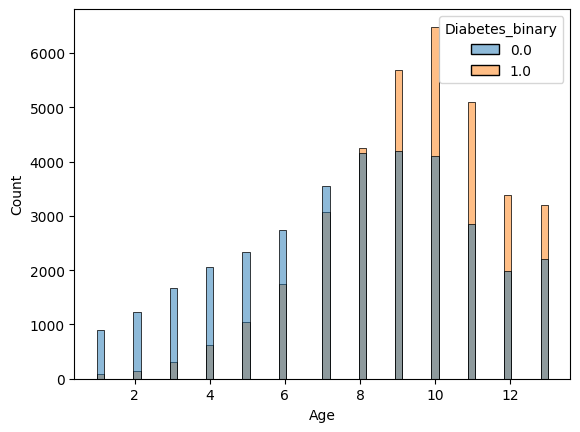

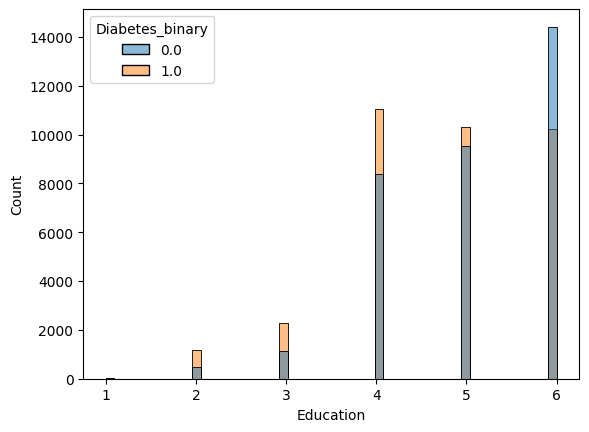

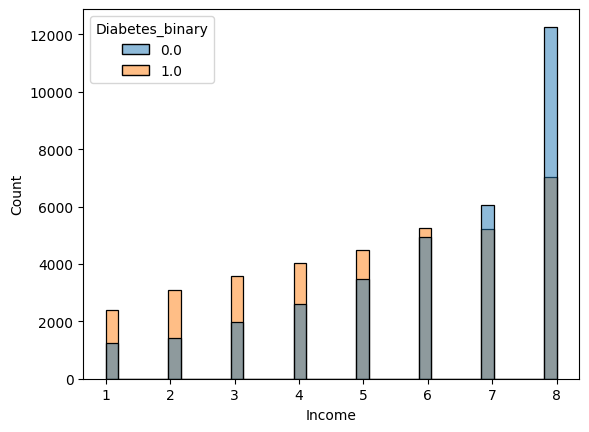

In [9]:
for column in df.columns:
  sns.histplot(data=df, x=column, hue="Diabetes_binary")
  plt.show()

In [10]:
df = df.drop(columns=["CholCheck",
                      "Stroke",
                      "HeartDiseaseorAttack",
                      "HvyAlcoholConsump",
                      "AnyHealthcare",
                      "NoDocbcCost"])
df

,Diabetes_binary,HighBP,HighChol,BMI,Smoker,PhysActivity,Fruits,Veggies,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,1.0,0.0,1.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,1.0,1.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [11]:
print(df.duplicated().sum())
print(df.duplicated().sum()*100/len(df))

562
0.8138204671503251


In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

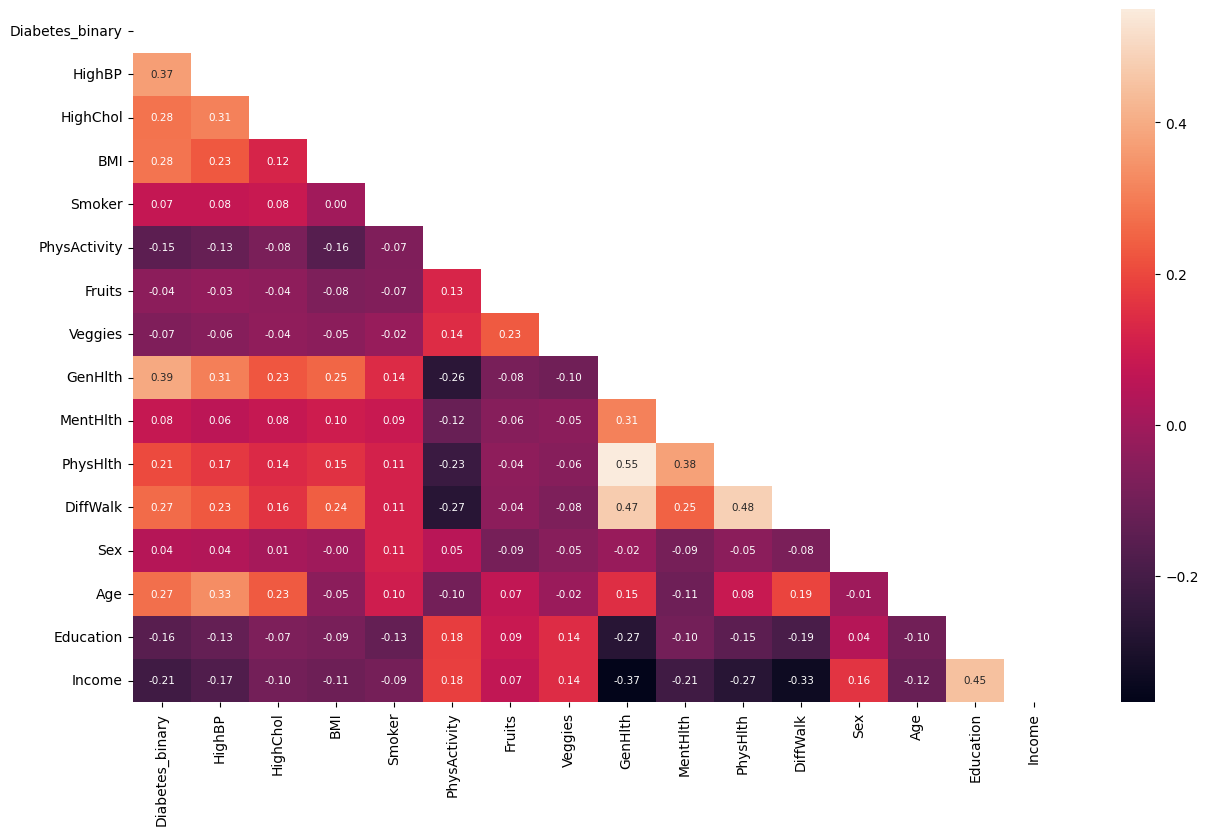

In [13]:
df_corr = np.round(df.corr(),5)
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

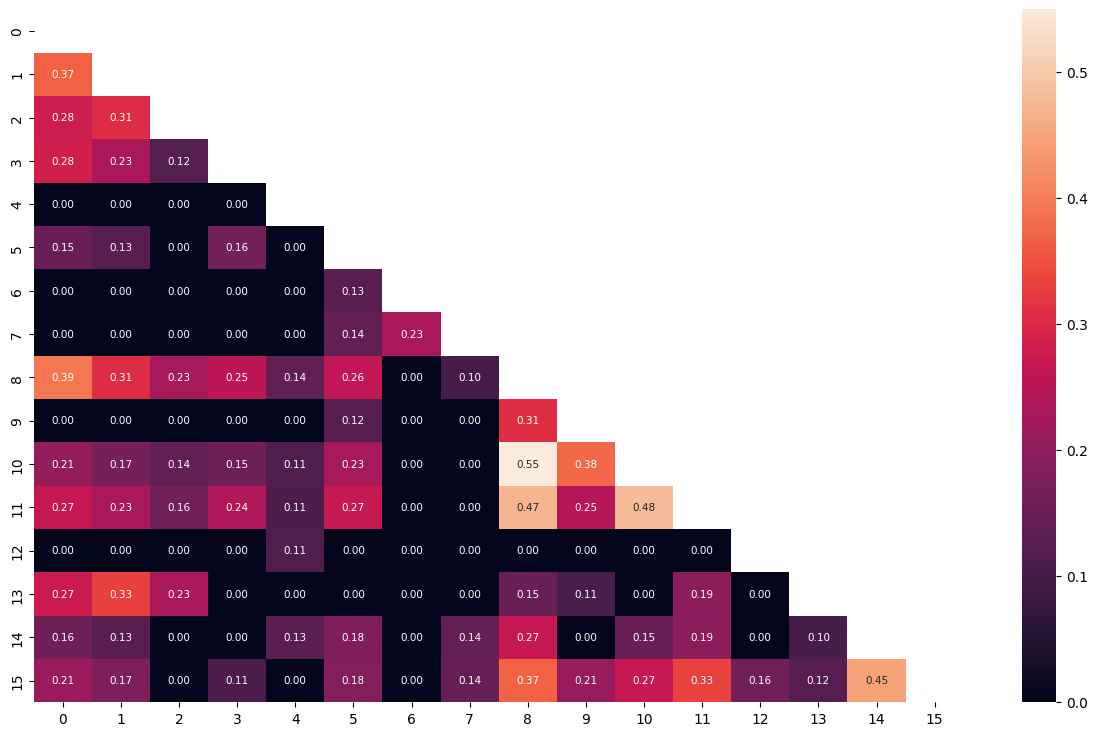

In [14]:
df_corr_modified = abs(np.array(df_corr))
for i in range(len(df_corr_modified)):
    for j in range(len(df_corr_modified)):
        if df_corr_modified[i][j] <= 0.1:
            df_corr_modified[i][j] = 0

mask = np.zeros_like(df_corr_modified)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 9))
ax = sns.heatmap(df_corr_modified, mask=mask, annot=True, annot_kws={'size':7.5}, fmt=".2f")

In [15]:
df = df.drop(columns=["Smoker",
                      "Fruits",
                      "Veggies",
                      "MentHlth",
                      "Sex"])
df

,Diabetes_binary,HighBP,HighChol,BMI,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,1.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,1.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,1.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,1.0,2.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,37.0,0.0,4.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,29.0,0.0,2.0,0.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,25.0,0.0,5.0,0.0,1.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,18.0,0.0,4.0,0.0,1.0,11.0,2.0,4.0


In [16]:
print(df.duplicated().sum())
print(df.duplicated().sum()*100/len(df))

8386
12.243229432805315


In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60109 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diabetes_binary  60109 non-null  float64
 1   HighBP           60109 non-null  float64
 2   HighChol         60109 non-null  float64
 3   BMI              60109 non-null  float64
 4   PhysActivity     60109 non-null  float64
 5   GenHlth          60109 non-null  float64
 6   PhysHlth         60109 non-null  float64
 7   DiffWalk         60109 non-null  float64
 8   Age              60109 non-null  float64
 9   Education        60109 non-null  float64
 10  Income           60109 non-null  float64
dtypes: float64(11)
memory usage: 5.5 MB


In [23]:
np.random.seed(2)
scaler = MinMaxScaler()
X_df = df.drop('Diabetes_binary', axis=1)
X = scaler.fit_transform(X_df)
y = df['Diabetes_binary']
y = y.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [24]:
model = Sequential()
n_input = X_train.shape[1]

model = Sequential([
    Dense(60, activation='relu', input_dim=n_input),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='nadam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 60)                660       
                                                                 
 dense_5 (Dense)             (None, 30)                1830      
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2811 (10.98 KB)
Trainable params: 2811 (10.98 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
start = time.time()
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.001)
history = model.fit(X_train, y_train, epochs=100, batch_size=100, shuffle=True, validation_split=0.2, callbacks=[callback, reduce_lr])
end = time.time()
print('Time execution:', (end-start), 's')

Epoch 1/100
385/385 [==============================] - 5s 3ms/step - loss: 0.1994 - accuracy: 0.6974 - val_loss: 0.1868 - val_accuracy: 0.7193 - lr: 0.0010
Epoch 2/100
385/385 [==============================] - 1s 3ms/step - loss: 0.1863 - accuracy: 0.7198 - val_loss: 0.1833 - val_accuracy: 0.7243 - lr: 0.0010
Epoch 3/100
385/385 [==============================] - 1s 3ms/step - loss: 0.1841 - accuracy: 0.7224 - val_loss: 0.1821 - val_accuracy: 0.7263 - lr: 0.0010
Epoch 4/100
385/385 [==============================] - 1s 3ms/step - loss: 0.1833 - accuracy: 0.7240 - val_loss: 0.1830 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 5/100
385/385 [==============================] - 1s 3ms/step - loss: 0.1830 - accuracy: 0.7245 - val_loss: 0.1820 - val_accuracy: 0.7268 - lr: 0.0010
Epoch 6/100
385/385 [==============================] - 1s 3ms/step - loss: 0.1827 - accuracy: 0.7245 - val_loss: 0.1817 - val_accuracy: 0.7282 - lr: 0.0010
Epoch 7/100
385/385 [==============================] - 1s 3ms/st

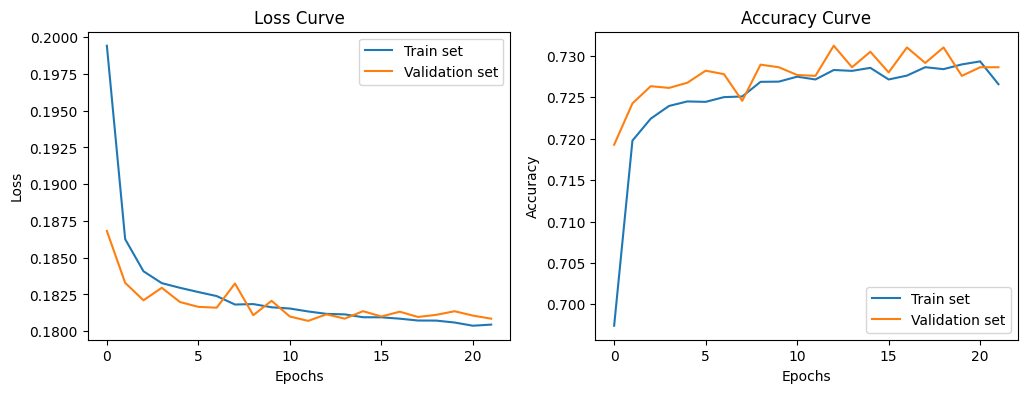

In [26]:
# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train set')
plt.plot(history.history['val_loss'], label='Validation set')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train set')
plt.plot(history.history['val_accuracy'], label='Validation set')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

When threshold is 0.4, AUC for our model is 0.7
When threshold is 0.402, AUC for our model is 0.701
When threshold is 0.404, AUC for our model is 0.701
When threshold is 0.406, AUC for our model is 0.702
When threshold is 0.408, AUC for our model is 0.702
When threshold is 0.41, AUC for our model is 0.703
When threshold is 0.412, AUC for our model is 0.704
When threshold is 0.414, AUC for our model is 0.705
When threshold is 0.416, AUC for our model is 0.705
When threshold is 0.418, AUC for our model is 0.706
When threshold is 0.42, AUC for our model is 0.707
When threshold is 0.422, AUC for our model is 0.707
When threshold is 0.424, AUC for our model is 0.707
When threshold is 0.426, AUC for our model is 0.708
When threshold is 0.428, AUC for our model is 0.709
When threshold is 0.43, AUC for our model is 0.71
When threshold is 0.432, AUC for our model is 0.71
When threshold is 0.434, AUC for our model is 0.71
When threshold is 0.436, AUC for our model is 0.711
When threshold is 0.43

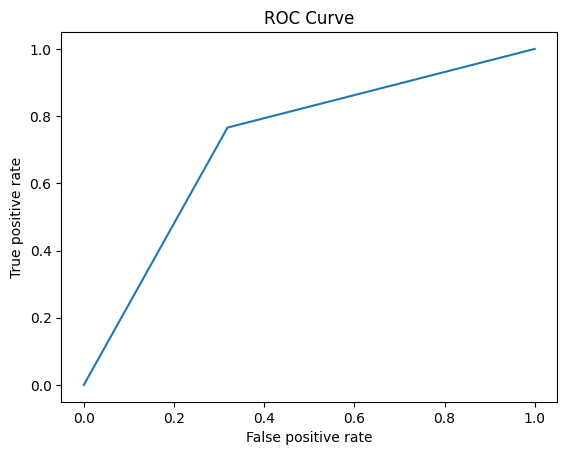

In [27]:
auc_max = 0
for i in range(0,100):
  threshold = round(0.4 + 0.002*i,3)

  y_pred = model.predict(X_test, verbose=0)
  y_pred = (y_pred > threshold)

  auc = np.round(roc_auc_score(y_test, y_pred), 3)
  print("When threshold is {}, AUC for our model is {}".format(threshold,auc))
  if auc > auc_max:
    auc_max = auc
    threshold_selected = threshold

y_pred = model.predict(X_test)
y_pred = (y_pred > threshold_selected)

auc = np.round(roc_auc_score(y_test, y_pred), 5)
print("AUC for our sample data with threshold of {} is {}".format(threshold_selected,auc))

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

376/376 [==============================] - 0s 1ms/step
Confussion Matrix:
[[3855 1803]
 [1490 4874]]


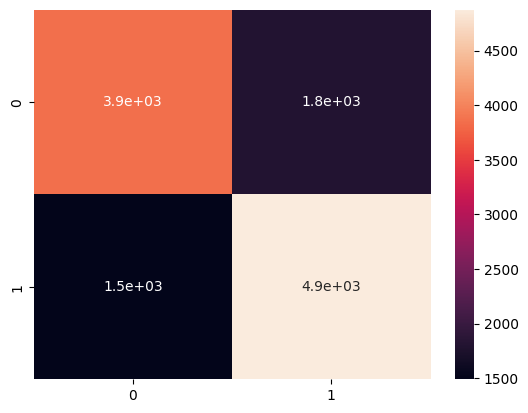

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      5658
         1.0       0.73      0.77      0.75      6364

    accuracy                           0.73     12022
   macro avg       0.73      0.72      0.72     12022
weighted avg       0.73      0.73      0.73     12022



In [28]:
y_pred = model.predict(X_test)
y_pred = (y_pred > threshold_selected)

cm = confusion_matrix(y_test, y_pred)
print('Confussion Matrix:')
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)